<a href="https://colab.research.google.com/github/Suvraneel/fcc-machine-learning-with-python/blob/fcc-practice/stocksMu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
cwd = os.getcwd()

In [2]:
# Data scraping backup
# !pip install jugaad-data

In [3]:
# from google.colab import drive
# drive.mount("/content/drive")

In [4]:
# !pip install nsepy
# from nsepy import get_history
# from datetime import date
# data = get_history(symbol="SBIN", start=date(2019,1,1), end=date(2020,12,30))
# data[['Close']].plot()

In [5]:
!git clone -b '4.0' https://github.com/NSEDownload/NSEDownload
!pip3 install NSEDownload/dist/NSEDownload-4.0.tar.gz 

Cloning into 'NSEDownload'...
remote: Enumerating objects: 484, done.
remote: Counting objects: 100% (484/484), done.
remote: Compressing objects: 100% (352/352), done.
remote: Total 484 (delta 261), reused 325 (delta 126), pack-reused 0
Receiving objects: 100% (484/484), 668.71 KiB | 6.37 MiB/s, done.
Resolving deltas: 100% (261/261), done.
Processing ./NSEDownload/dist/NSEDownload-4.0.tar.gz
     |████████████████████████████████| 50 kB 2.7 MB/s 
  Created wheel for NSEDownload: filename=NSEDownload-4.0-py3-none-any.whl size=18564 sha256=08eafd340750ed2fd58b4a47fd9993766109088e2edada0960d8cc50da1cfa39
  Stored in directory: /root/.cache/pip/wheels/1d/c6/06/c12dd070b8c82e167702f0810ca29461c2abd6e59e5428da0b
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149864 sha256=c760881ce7bf304f227b45893e6a8be39070b65833b0b73f9ca549a55f8a005b
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c55108

# Example Symbols
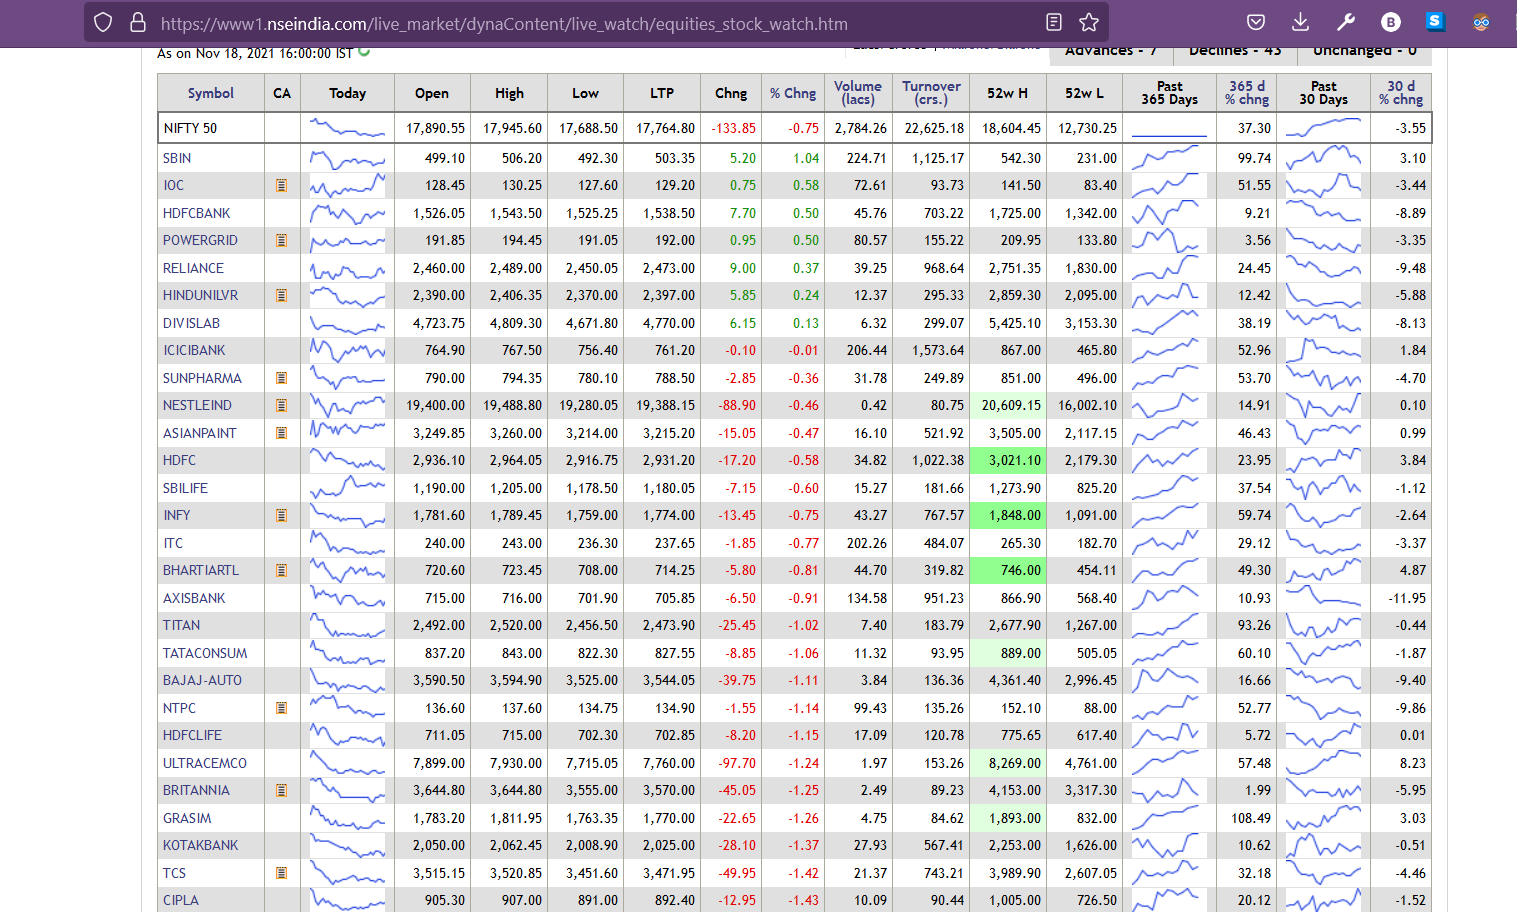

In [6]:
def convert_date(x,y,z):
    orig_date = datetime(x,y,z)
    orig_date = str(orig_date)
    d = datetime.strptime(orig_date, '%Y-%m-%d %H:%M:%S')
    d = d.strftime('%m/%d/%y')
    return d

In [7]:
from NSEDownload import stocks
# symbol = input("Enter symbol of stock\n") # Tested : SBIN, AXISBANK, RELIANCE, IOC, BHARTIARTL
symbol="BHARTIARTL"
df = stocks.get_data(stockSymbol = symbol, start_date = '1-1-2018', end_date = '01-12-2021')
df = stocks.get_adjusted_data(symbol, df)
from google.colab import data_table
data_table.DataTable(df, include_index=True, num_rows_per_page=10)
# df

BHARTIARTL


,Symbol,Series,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,
Date,,,,,,,,,,,,,,
2018-01-01,BHARTIARTL,EQ,531.00,538.1,525.40,527.95,527.90,532.51,4333190,2.307486e+09,35087,1340521,30.94,
2018-01-02,BHARTIARTL,EQ,532.90,532.9,511.85,516.70,516.55,521.44,4724570,2.463556e+09,52103,2322487,49.16,
2018-01-03,BHARTIARTL,EQ,519.15,525.5,514.75,516.75,518.20,521.37,5707905,2.975947e+09,47040,3499441,61.31,
2018-01-04,BHARTIARTL,EQ,519.00,527.2,514.50,523.90,523.00,520.70,5366018,2.794101e+09,60595,3133073,58.39,
2018-01-05,BHARTIARTL,EQ,525.00,542.5,518.55,539.90,540.00,534.11,7218024,3.855251e+09,94131,2918981,40.44,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,BHARTIARTL,EQ,759.05,768.5,752.80,765.00,765.15,761.66,8483653,6.461638e+09,150394,2681655,31.61,
2021-11-26,BHARTIARTL,EQ,763.00,763.0,733.10,735.85,738.75,744.93,11142921,8.300683e+09,213934,5499123,49.35,
2021-11-29,BHARTIARTL,EQ,752.00,755.0,727.10,738.05,739.35,740.06,15885643,1.175626e+10,277565,8822195,55.54,


In [8]:
# from datetime import date
# from jugaad_data.nse import bhavcopy_save, bhavcopy_fo_save

# # Download bhavcopy
# bhavcopy_save(date(2020,1,1), "/content/drive/MyDrive/NSEdata/")

# # Download bhavcopy for futures and options
# bhavcopy_fo_save(date(2020,1,1), "/content/drive/MyDrive/NSEdata/")

# # Download stock data to pandas dataframe
# from jugaad_data.nse import stock_df
# df = stock_df(symbol="SBIN", from_date=date(2019,1,1),
#             to_date=date(2020,12,30), series="EQ")
# df.head(15)


In [9]:
# s = "/content/drive/MyDrive/nse_data_legacy.csv"
df = df.drop('Series', 1)
df = df.drop('Symbol', 1)
dataset_train = pd.DataFrame(df)
dataset_train = df
training_set = dataset_train.iloc[:, 1:2].values
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12',
               ...
               '2021-11-17', '2021-11-18', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-29',
               '2021-11-30', '2021-12-01'],
              dtype='datetime64[ns]', name='Date', length=969, freq=None)

In [10]:
print(df.index.min(), df.index.max()) 
print(dataset_train.shape)
data_table.DataTable(dataset_train, include_index=True, num_rows_per_page=10)
# dataset_train.head(15)

2018-01-01 00:00:00 2021-12-01 00:00:00
(969, 12)


,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,
Date,,,,,,,,,,,,
2018-01-01,531.00,538.1,525.40,527.95,527.90,532.51,4333190,2.307486e+09,35087,1340521,30.94,
2018-01-02,532.90,532.9,511.85,516.70,516.55,521.44,4724570,2.463556e+09,52103,2322487,49.16,
2018-01-03,519.15,525.5,514.75,516.75,518.20,521.37,5707905,2.975947e+09,47040,3499441,61.31,
2018-01-04,519.00,527.2,514.50,523.90,523.00,520.70,5366018,2.794101e+09,60595,3133073,58.39,
2018-01-05,525.00,542.5,518.55,539.90,540.00,534.11,7218024,3.855251e+09,94131,2918981,40.44,
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,759.05,768.5,752.80,765.00,765.15,761.66,8483653,6.461638e+09,150394,2681655,31.61,
2021-11-26,763.00,763.0,733.10,735.85,738.75,744.93,11142921,8.300683e+09,213934,5499123,49.35,
2021-11-29,752.00,755.0,727.10,738.05,739.35,740.06,15885643,1.175626e+10,277565,8822195,55.54,


### Drop columns which contain missing value
Read documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)


In [11]:
df = df.dropna(axis = "columns")
df.head(5)

,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,
Date,,,,,,,,,,,,
2018-01-01,531.00,538.1,525.40,527.95,527.90,532.51,4333190,2.307486e+09,35087,1340521,30.94,
2018-01-02,532.90,532.9,511.85,516.70,516.55,521.44,4724570,2.463556e+09,52103,2322487,49.16,
2018-01-03,519.15,525.5,514.75,516.75,518.20,521.37,5707905,2.975947e+09,47040,3499441,61.31,
2018-01-04,519.00,527.2,514.50,523.90,523.00,520.70,5366018,2.794101e+09,60595,3133073,58.39,
2018-01-05,525.00,542.5,518.55,539.90,540.00,534.11,7218024,3.855251e+09,94131,2918981,40.44,


In [12]:
df_close = df.reset_index()['Close Price']
df_close

0      527.90
1      516.55
2      518.20
3      523.00
4      540.00
        ...  
964    765.15
965    738.75
966    739.35
967    728.25
968    722.25
Name: Close Price, Length: 969, dtype: float64

In [13]:
df_close = df_close.values.reshape(-1,1)
df_close

array([[527.9 ],
       [516.55],
       [518.2 ],
       [523.  ],
       [540.  ],
       [516.35],
       [509.8 ],
       [506.4 ],
       [514.75],
       [509.55],
       [504.5 ],
       [497.25],
       [499.9 ],
       [495.  ],
       [497.9 ],
       [490.7 ],
       [492.1 ],
       [459.5 ],
       [452.7 ],
       [440.6 ],
       [440.6 ],
       [439.85],
       [438.4 ],
       [422.35],
       [440.2 ],
       [439.15],
       [430.25],
       [429.8 ],
       [422.5 ],
       [424.4 ],
       [434.8 ],
       [428.95],
       [419.7 ],
       [414.35],
       [418.1 ],
       [419.65],
       [416.1 ],
       [425.55],
       [423.15],
       [430.5 ],
       [428.55],
       [427.75],
       [421.45],
       [413.9 ],
       [403.2 ],
       [401.3 ],
       [402.15],
       [421.55],
       [426.3 ],
       [422.6 ],
       [420.45],
       [416.75],
       [399.65],
       [400.4 ],
       [418.2 ],
       [415.6 ],
       [412.7 ],
       [421.5 ],
       [413.2 

## Data Normalization
In order to normalise the data, we need to scale it between 0 and 1 so we talk on a common scale. To accomplish this, we can use the preprocessing tool MinMaxScaler as seen below:

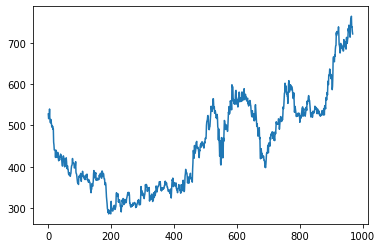

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
#Plot closing price
plt.plot(df_close)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(df_close)

## Splitting into into train set, test set & validation set :  
  
 | train | test | 
 :------:|:----:|  
 | 70 | 30 |

In [15]:
# Splitting dataset into training & testing set
train_size = int(len(df_close) * 0.70)
test_size = len(df_close) - train_size
# holding rest of the data for blackbox testing = without ever using b4
train, test = df_close[0:train_size,:], df_close[train_size:len(df_close),:1]
print(len(train), len(test))

678 291


# Recursive Feature Elimination :
- Forget irrelevant data from long back


## Adding Timesteps

LSTM network needs the data imported as a 3D array. To translate this 2D array into a 3D one, we use a short timestep to loop through the data and create smaller partitions and feed them into the model. The final array is then reshaped into training samples, x number of timesteps, and 1 feature per step. The code below represents this concept:

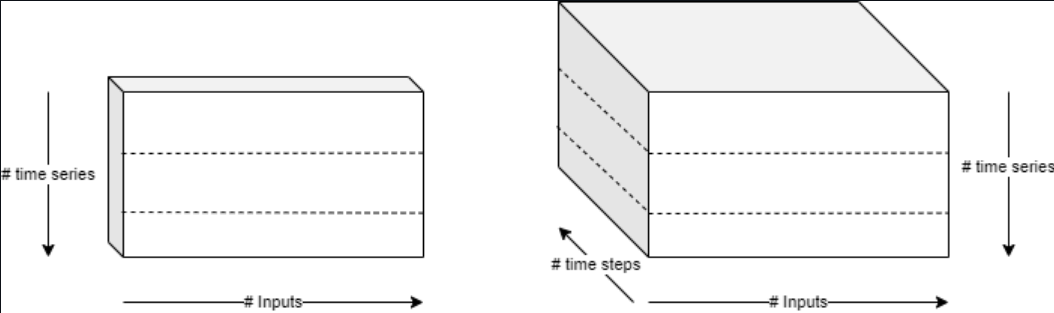


    time_steps = 3
    for i in range(time_steps, train_scaled.shape[0]):
        x_train.append(train_scaled[i - time_steps:i])
        y_train.append(train_scaled[i, 0])

We have implemented a time step of 3 days. Using this technique, we allow our network to look back 3 days on our data to predict the subsequent day). The figure below represents how our implementation uses this concept and how the first 3 samples for Close price would generate the 4th sample and so on.This will generate a matrix of shape (3,1), 3 being the time steps and 1 the number of features (Close price).

In [16]:
    # time_steps = 3
    # trainX = []
    # trainY = []
    # for i in range(time_steps, train.shape[0]):
    #     trainX.append(train[i - time_steps:i])
    #     trainY.append(train[i, 0])

    # # Testing Data Transformation
    # testX = []
    # testY = []
    # for i in range(time_steps, test.shape[0]):
    #     testX.append(test[i - time_steps:i])
    #     testY.append(test[i, 0])

    # testX, testY = np.array(testX), np.array(testY)
    # testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))



In [17]:
# Normalize the values such that prices are reduced to normalized values and prediction of stock movement instead of actual prices
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1): # keep only similar value data if a data point is too far of the last one jump to the next value
	dataX, dataY = [], []       # put this in data x
	for i in range(len(dataset)-look_back-1): # let dataY have only output values
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [18]:
# reshape into X=t and Y=t+1
look_back = 100
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [19]:
print(trainX.shape)
print(trainY.shape)
trainX

(577, 100)
(577,)


array([[0.50552313, 0.48186744, 0.48530638, ..., 0.18038766, 0.19091288,
        0.18716132],
       [0.48186744, 0.48530638, 0.49531055, ..., 0.19091288, 0.18716132,
        0.19549812],
       [0.48530638, 0.49531055, 0.53074198, ..., 0.18716132, 0.19549812,
        0.18851605],
       ...,
       [0.50583576, 0.54324719, 0.50583576, ..., 0.43601501, 0.3801584 ,
        0.38682784],
       [0.54324719, 0.50583576, 0.51000417, ..., 0.3801584 , 0.38682784,
        0.30939975],
       [0.50583576, 0.51000417, 0.52282201, ..., 0.38682784, 0.30939975,
        0.27917882]])

In [20]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# Implication : trainX.shape[0] samples (No of time series tuples), trainX.shape[1] (here, 3) time steps, 1 feature because univariate

In [21]:
trainX.shape

(577, 100, 1)

In [22]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time #helper libraries

Building the LSTM  
In order to build the LSTM, we need to import a couple of modules from Keras:

    Sequential for initializing the neural network
    Dense for adding a densely connected neural network layer
    LSTM for adding the Long Short-Term Memory layer
    Dropout for adding dropout layers that prevent overfitting

> [Understanding LSTM - References](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) 

In [23]:
regressor = Sequential()    # Init regressor
# 1st layer with Dropout regularisation
# * units = add 100 neurons is the dimensionality of the output space
# * return_sequences = True to stack LSTM layers so the next LSTM layer has a three-dimensional sequence input
# * input_shape => Shape of the training dataset
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (trainX.shape[1], 1)))
# 20% of the layers will be dropped
# regressor.add(Dropout(0.2))

# 2nd LSTM layer
# * units = add 50 neurons is the dimensionality of the output space
# * return_sequences = True to stack LSTM layers so the next LSTM layer has a three-dimensional sequence input
regressor.add(LSTM(units = 50, return_sequences = True))
# 20% of the layers will be dropped
                                          # regressor.add(Dropout(0.2))
# 3rd layer
                                          # regressor.add(LSTM(units = 50, return_sequences = True))
                                          # regressor.add(Dropout(0.2))

# 4th LSTM layer
# * units = add 100 neurons is the dimensionality of the output space
regressor.add(LSTM(units = 100))     # return = false
# 50% of the layers will be dropped
# regressor.add(Dropout(0.2))

# Dense layer that specifies an output of one unit
regressor.add(Dense(units = 1))     #last layer
regressor.add(Activation('relu'))

regressor.summary()

# set project folder to generate flowchart for model
# tf.keras.utils.plot_model(regressor, to_file=os.path.join(project_folder, 'model_lstm.png'), show_shapes=True,
#                               show_layer_names=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 91,101
Trainable params: 91,101
Non-trainable params: 0
_________________________________________________________________


Once the model has been defined, we need to specify the metrics we want to use to track how well the model is behaving
Further, specify the kind of optimizer to be used for training.
The patience for model to have has also been defined and what is the rule defined for it.

In [24]:
start = time.time()
defined_metrics = [
        tf.keras.metrics.MeanSquaredError(name='MSE'),
        tf.keras.metrics.MeanAbsoluteError(name='MAE'),
    ]
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)
regressor.compile(loss='mse', optimizer='adam', metrics=defined_metrics)
print ('compilation time : ', time.time() - start)

# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')      #adam = mean of sq. error b/w actual & predicted values
# regressor.fit(X_train, y_train, epochs =60, batch_size = 32) # epoch = 100 #validation_data=None #shuffle=True

compilation time :  0.030873775482177734


In [25]:
history = regressor.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=100,
    validation_data=(testX,testY)
    # validation_split=0.25
    # callbacks=[callback]
    )

Epoch 1/100
5/5 [==============================] - 14s 938ms/step - loss: 0.0758 - MSE: 0.0758 - MAE: 0.2099 - val_loss: 0.1354 - val_MSE: 0.1354 - val_MAE: 0.3459
Epoch 2/100
5/5 [==============================] - 3s 701ms/step - loss: 0.0183 - MSE: 0.0183 - MAE: 0.1153 - val_loss: 0.0154 - val_MSE: 0.0154 - val_MAE: 0.0936
Epoch 3/100
5/5 [==============================] - 3s 700ms/step - loss: 0.0099 - MSE: 0.0099 - MAE: 0.0795 - val_loss: 0.0796 - val_MSE: 0.0796 - val_MAE: 0.2630
Epoch 4/100
5/5 [==============================] - 3s 694ms/step - loss: 0.0095 - MSE: 0.0095 - MAE: 0.0714 - val_loss: 0.0078 - val_MSE: 0.0078 - val_MAE: 0.0667
Epoch 5/100
5/5 [==============================] - 3s 696ms/step - loss: 0.0059 - MSE: 0.0059 - MAE: 0.0630 - val_loss: 0.0044 - val_MSE: 0.0044 - val_MAE: 0.0518
Epoch 6/100
5/5 [==============================] - 4s 706ms/step - loss: 0.0036 - MSE: 0.0036 - MAE: 0.0450 - val_loss: 0.0139 - val_MSE: 0.0139 - val_MAE: 0.0988
Epoch 7/100
5/5 [====

This model is slightly fined tuned to reach the lowest validation loss. In this example, we reach a validation loss of 0.14% with an MSE (Mean Square Error) of **6.4448e-04%** which is relatively good, providing us with a very accurate result.

We can try decreasing the patience of the model to observe how soon the model gets trained.
Increasing the patience too much might result in ove-training the model. 

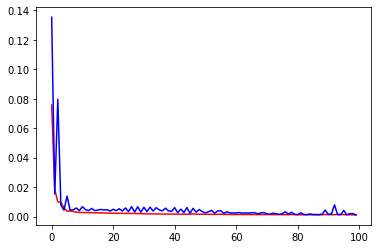

In [26]:
plt.plot(history.history['loss'], color = 'red')
plt.plot(history.history['val_loss'], color = 'blue')

In [27]:
### Lets Do the prediction and check performance metrics
train_predict=regressor.predict(trainX)
test_predict=regressor.predict(testX)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


trainY= scaler.inverse_transform(trainY.reshape(-1,1))
testY= scaler.inverse_transform(testY.reshape(-1,1))

In [28]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(trainY,train_predict))

15.71239628323708

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(testY,test_predict))

15.958311882222633

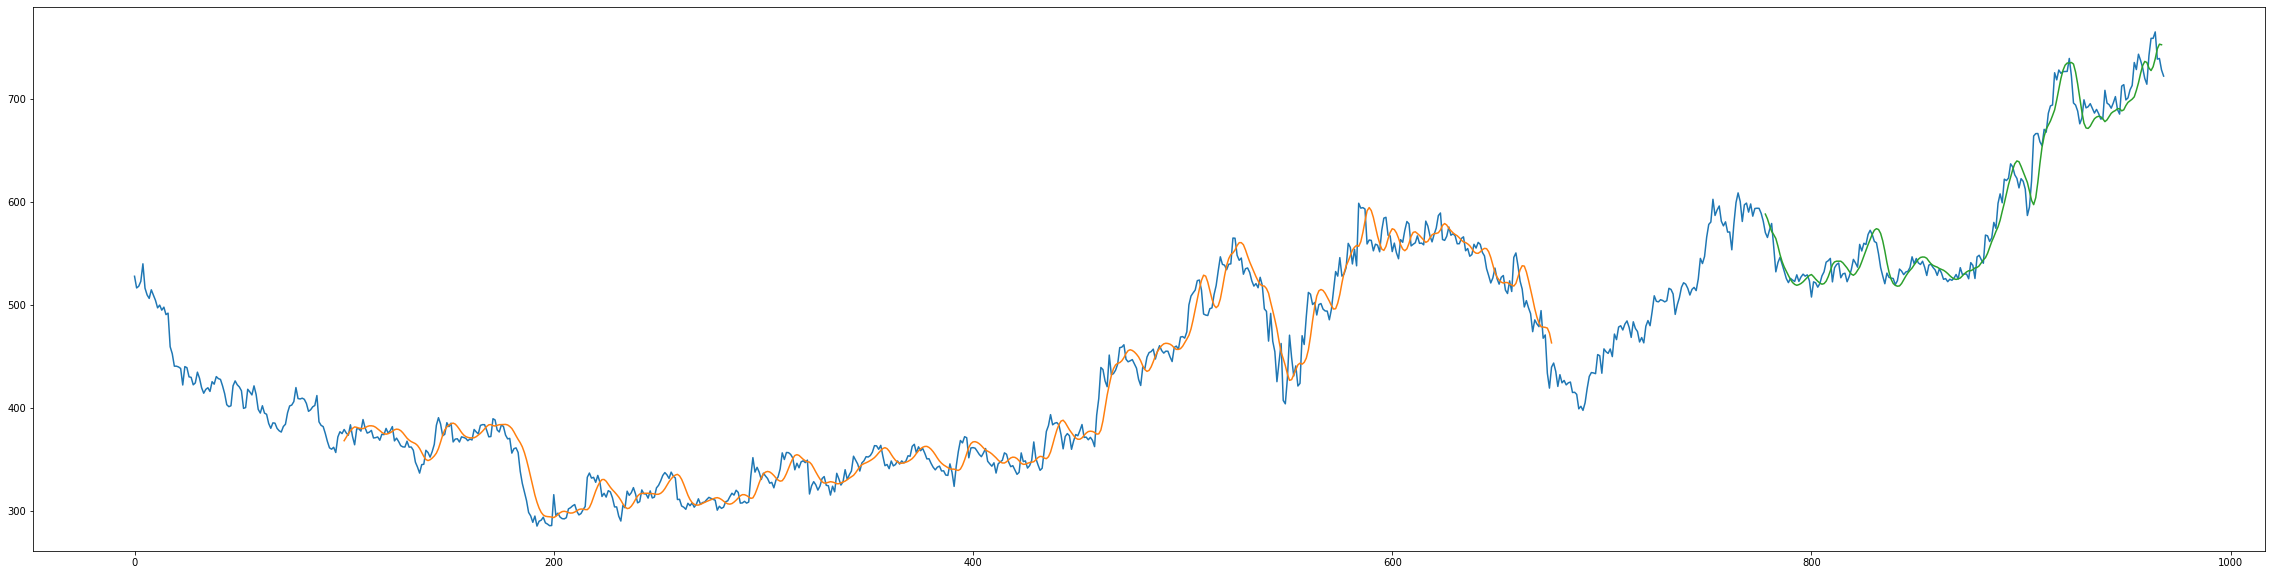

In [30]:
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [31]:
# predicted_stateful = regressor.predict(testX)
# plt.plot(testY, color = 'red',label = 'Actual Closing Prices')
# plt.plot(predicted_stateful.flatten(), color = 'blue', label  = 'Predicted closing Prices')
# plt.xlabel('Days')
# plt.ylabel('Normalised Prices')
# plt.legend(loc='best')
# plt.show()

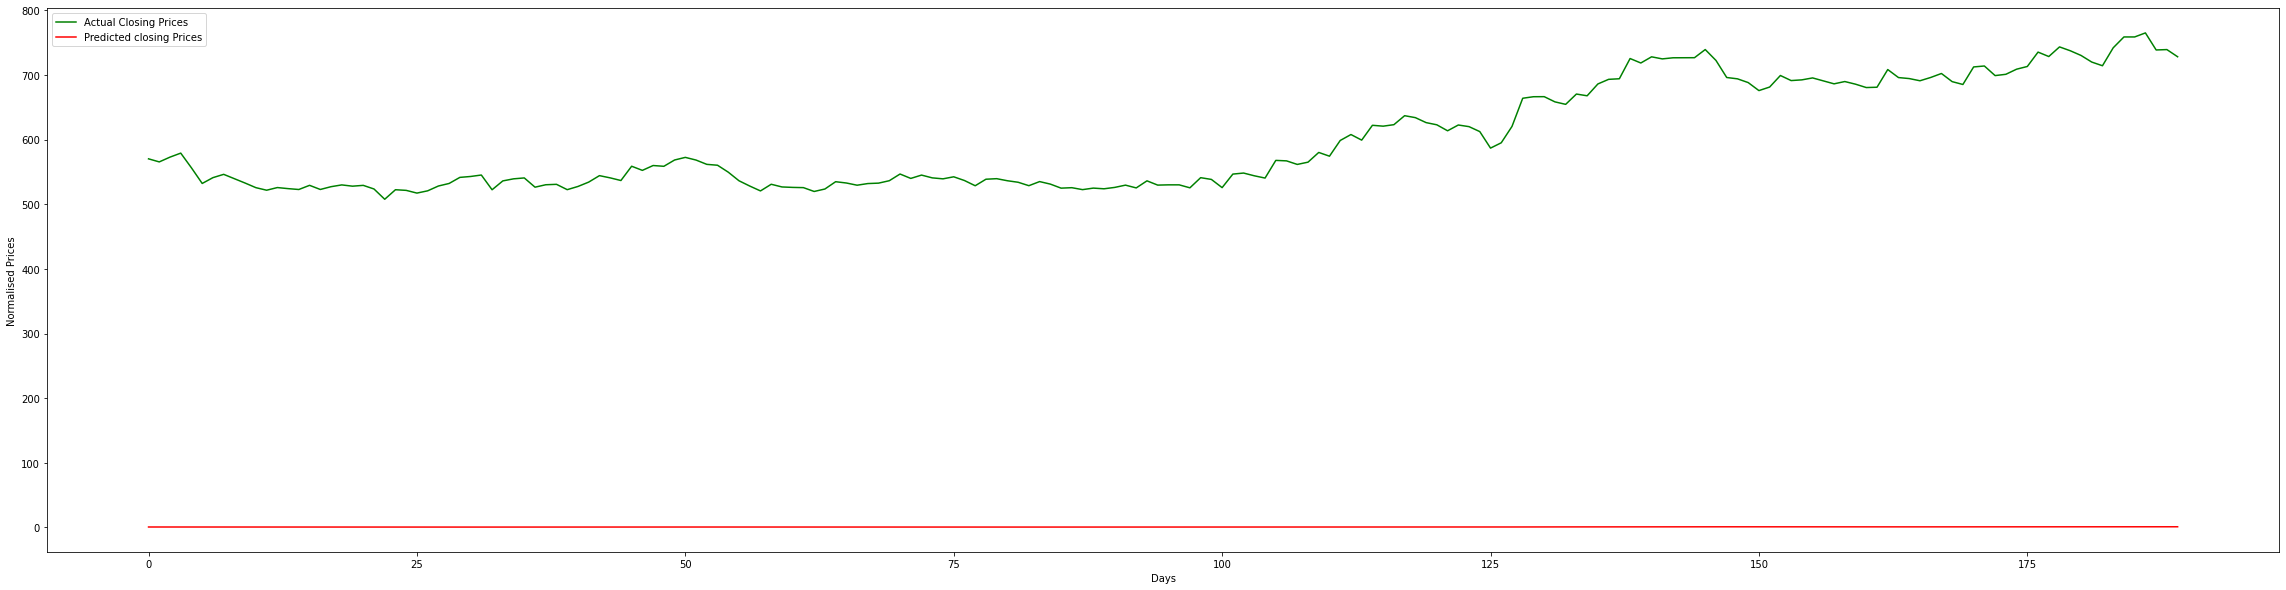

In [32]:
# Predicting even further in future based on non-current data
predicted_stateful = regressor.predict(testX)
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
plt.plot(testY, color = 'green',label = 'Actual Closing Prices')
plt.plot(predicted_stateful.flatten(), color = 'red', label  = 'Predicted closing Prices')
plt.xlabel('Days')
plt.ylabel('Normalised Prices')
plt.legend(loc='best')
plt.show()

## References/Read More :  
https://www.slideshare.net/LimZhiYuanZane/deep-learning-for-stock-prediction  
https://www.youtube.com/watch?v=Yq-yPc9qVyA  
https://jordicorbilla.github.io/stock-prediction-deep-neural-learning/ 
https://www.youtube.com/watch?v=H6du_pfuznE #remove
